# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [5]:
df_data.head(3)

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
# What is the shape of df_data? How many rows and columns?

print(f"There are {df_data.shape[0]} rows and {df_data.shape[1]} columns")

There are 962 rows and 16 columns


In [7]:
# What are the column names?

df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
# In which year was the Nobel prize first awarded?

print(f'The first year of nobel prize awarded is in {df_data.sort_values(by="year", ascending=True).head(1).year[0]}')
df_data.sort_values(by='year', ascending=True).head(1)

The first year of nobel prize awarded is in 1901


year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name  birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [9]:
# Which year is the latest year included in the dataset?

print(f'The latest year of nobel prize awarded is in {df_data.sort_values(by="year", ascending=False).head(1).year[961]}')

df_data.sort_values(by='year', ascending=False).head(1)

The latest year of nobel prize awarded is in 2020


year category                            prize  \
961  2020  Physics  The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
961  “for the discovery that black hole formation i...         1/2   

    laureate_type      full_name  birth_date  birth_city   birth_country  \
961    Individual  Roger Penrose  1931-08-08  Colchester  United Kingdom   

    birth_country_current   sex     organization_name organization_city  \
961        United Kingdom  Male  University of Oxford            Oxford   

    organization_country  ISO  
961       United Kingdom  GBR

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
# Are there any duplicate values in the dataset?

df_data.duplicated().values.any()

False

### Check for NaN Values

In [11]:
# Are there NaN values in the dataset?

df_data.isna().values.any()

True

In [12]:
# Which columns tend to have NaN values?

nan_columns = []
for column in df_data.columns:
    if df_data[column].isna().values.any() ==True:
        nan_columns.append(column)
        
print(nan_columns)

['motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']


In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
# How many NaN values are there per column?
df_data.motivation.isna().value_counts()[1]
nan_count = {}

for nan_column in nan_columns:
    nan_count[nan_column] = df_data[nan_column].isna().value_counts()[1]
    
nan_count

{'motivation': 88,
 'birth_date': 28,
 'birth_city': 31,
 'birth_country': 28,
 'birth_country_current': 28,
 'sex': 28,
 'organization_name': 255,
 'organization_city': 255,
 'organization_country': 254,
 'ISO': 28}

In [15]:
# Why do these columns have NaN values?
# Most of the nan value are because the person is not really well-known the identity because at that time was lacking of documentation

In [16]:
col = ['year','category', 'laureate_type', 'birth_date','full_name', 'organization_name']

df_data.loc[df_data.birth_date.isna()][col].head()

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN

In [17]:
df_data.loc[df_data.organization_name.isna()][col]

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [18]:
# Convert the birth_date column to Pandas Datetime objects

df_data.birth_date = pd.to_datetime(df_data.birth_date)
type(df_data.birth_date[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Add a Column with the Prize Share as a Percentage

In [19]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [20]:
# Add a Column called share_pct which has the laureates' share as a percentage in the form of a floating-point number.

#To convert a series into float and insert to new column, we can use two ways like below codes:

# 1. 

def to_float(prize):
    if '/' in prize:
        ab, bl = prize.split('/')
        return int(ab)/int(bl)
    return None


df_data.insert(loc=5, column='share_pct', value=df_data.prize_share.apply(to_float))

In [21]:
# 2. 
# separated_values = df_data.prize_share.str.split("/", expand=True)   # <- expand will make the split value into standalone value, if expand=False then the result will be a list
# numerator = pd.to_numeric(separated_values[0])
# denominator = pd.to_numeric(separated_values[1])
# df_data['share_pct'] = numerator/denominator
# df_data

In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   share_pct              962 non-null    float64       
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [23]:
import plotly.express as px

In [24]:
# male = df_data.sex.value_counts().Male
# female = df_data.sex.value_counts().Female

# values = [(male/(male+female)*100), (female/(male+female)*100)]
# names = ['male', 'female']

# fig = px.pie(
#     df_data, 
#     values=values,
#     names=names,
#     title='Man vs Woman Nobel Prize'
# )

# fig.show()

gender = df_data.sex.value_counts().index
num_gender = df_data.sex.value_counts().values

fig = px.pie(
    df_data,
    values=num_gender,
    names=gender,
    hole=0.4,
    title='Percentage of Male vs. Female Winners'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
    textfont_size=14
)

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [25]:
# What are the names of the first 3 female Nobel laureates?

col=['full_name', 'motivation', 'birth_date', 'laureate_type']

df_data.query('sex=="Female"').sort_values(by='year')[col][:3]

full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                                           motivation birth_date laureate_type  
18  "in recognition of the extraordinary services ... 1867-11-07    Individual  
29                                                NaN 1843-06-09    Individual  
51  "in appreciation of the lofty idealism, vivid ... 1858-11-20    Individual

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [149]:
is_duplicate_winner = df_data.duplicated(subset=['full_name'])

col = ['full_name', 'prize', 'laureate_type', 'organization_name']

df_data[is_duplicate_winner][col]

full_name  \
62                         Marie Curie, née Sklodowska   
215  Comité international de la Croix Rouge (Intern...   
340                                 Linus Carl Pauling   
348  Comité international de la Croix Rouge (Intern...   
424                                       John Bardeen   
505                                   Frederick Sanger   
523  Office of the United Nations High Commissioner...   

                                 prize laureate_type  \
62   The Nobel Prize in Chemistry 1911    Individual   
215         The Nobel Peace Prize 1944  Organization   
340         The Nobel Peace Prize 1962    Individual   
348         The Nobel Peace Prize 1963  Organization   
424    The Nobel Prize in Physics 1972    Individual   
505  The Nobel Prize in Chemistry 1980    Individual   
523         The Nobel Peace Prize 1981  Organization   

                                organization_name  
62                            Sorbonne University  
215                                           NaN  
340  California Institute of Technology (Caltech)  
348                                           NaN  
424                        University of Illinois  
505           MRC Laboratory of Molecular Biology  
523                                           NaN

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [27]:
# In how many categories are prizes awarded?

df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  share_pct  \
0  "in recognition of the extraordinary services ...         1/1       1.00   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [28]:
# In how many categories are prizes awarded?

df_data.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [29]:
# Create a plotly bar chart with the number of prizes awarded by category.
plotly_colorscales = px.colors.named_colorscales()

fig = px.bar(
    x=df_data.category.value_counts().index,
    y=df_data.category.value_counts().values,
    labels={'y': 'Number of prizes', 'x': 'Category'},
    title='Number of Prizes per Category',
    color_continuous_scale='aggrnyl',
    color=df_data.category.value_counts().values
)
fig.update_layout(
    xaxis_tickangle=-45,
)

fig.show()

#### Category has the most number of prizes awarded is Medicine
#### Category has the fewest number of prizes awarded is Economics

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [30]:
# When was the first prize in the field of Economics awarded?

df_data.sort_values(by='year')[df_data.category=='Economics'].head(1)

C:\Users\Riki\AppData\Local\Temp\ipykernel_8044\136891166.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  share_pct  \
393  "for having developed and applied dynamic mode...         1/2       0.50   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  
393         Rotterdam          Netherlands  NLD

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [31]:
male_female = df_data.groupby(['sex', 'category'], as_index=False,).agg({'prize': pd.Series.count})
df_male_female = male_female.sort_values(by='sex', ascending=False)
df_male_female

sex    category  prize
6     Male   Chemistry    179
7     Male   Economics     84
8     Male  Literature    101
9     Male    Medicine    210
10    Male       Peace     90
11    Male     Physics    212
0   Female   Chemistry      7
1   Female   Economics      2
2   Female  Literature     16
3   Female    Medicine     12
4   Female       Peace     17
5   Female     Physics      4

In [32]:
fig = px.bar(
    df_male_female,
    x='category',
    y='prize',
    color='sex',
    labels={'prize': 'Number of Prizes', 'category': 'Nobel Prize Category'}
)

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
)

fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [33]:
# Count the number of prizes awarded every year.
prize_per_year = df_data.groupby('year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [34]:
# Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).

moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

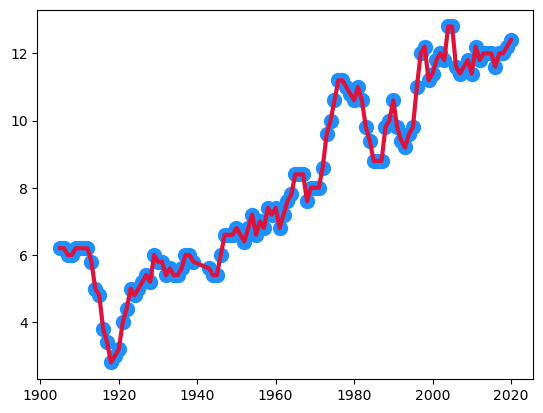

In [35]:
plt.scatter(
    x=moving_average.index,
    y=moving_average.values,
    c='dodgerblue',
    s=100
)

plt.plot(
    moving_average.index,
    moving_average.values,
    c='crimson',
    linewidth=3
)

plt.show()

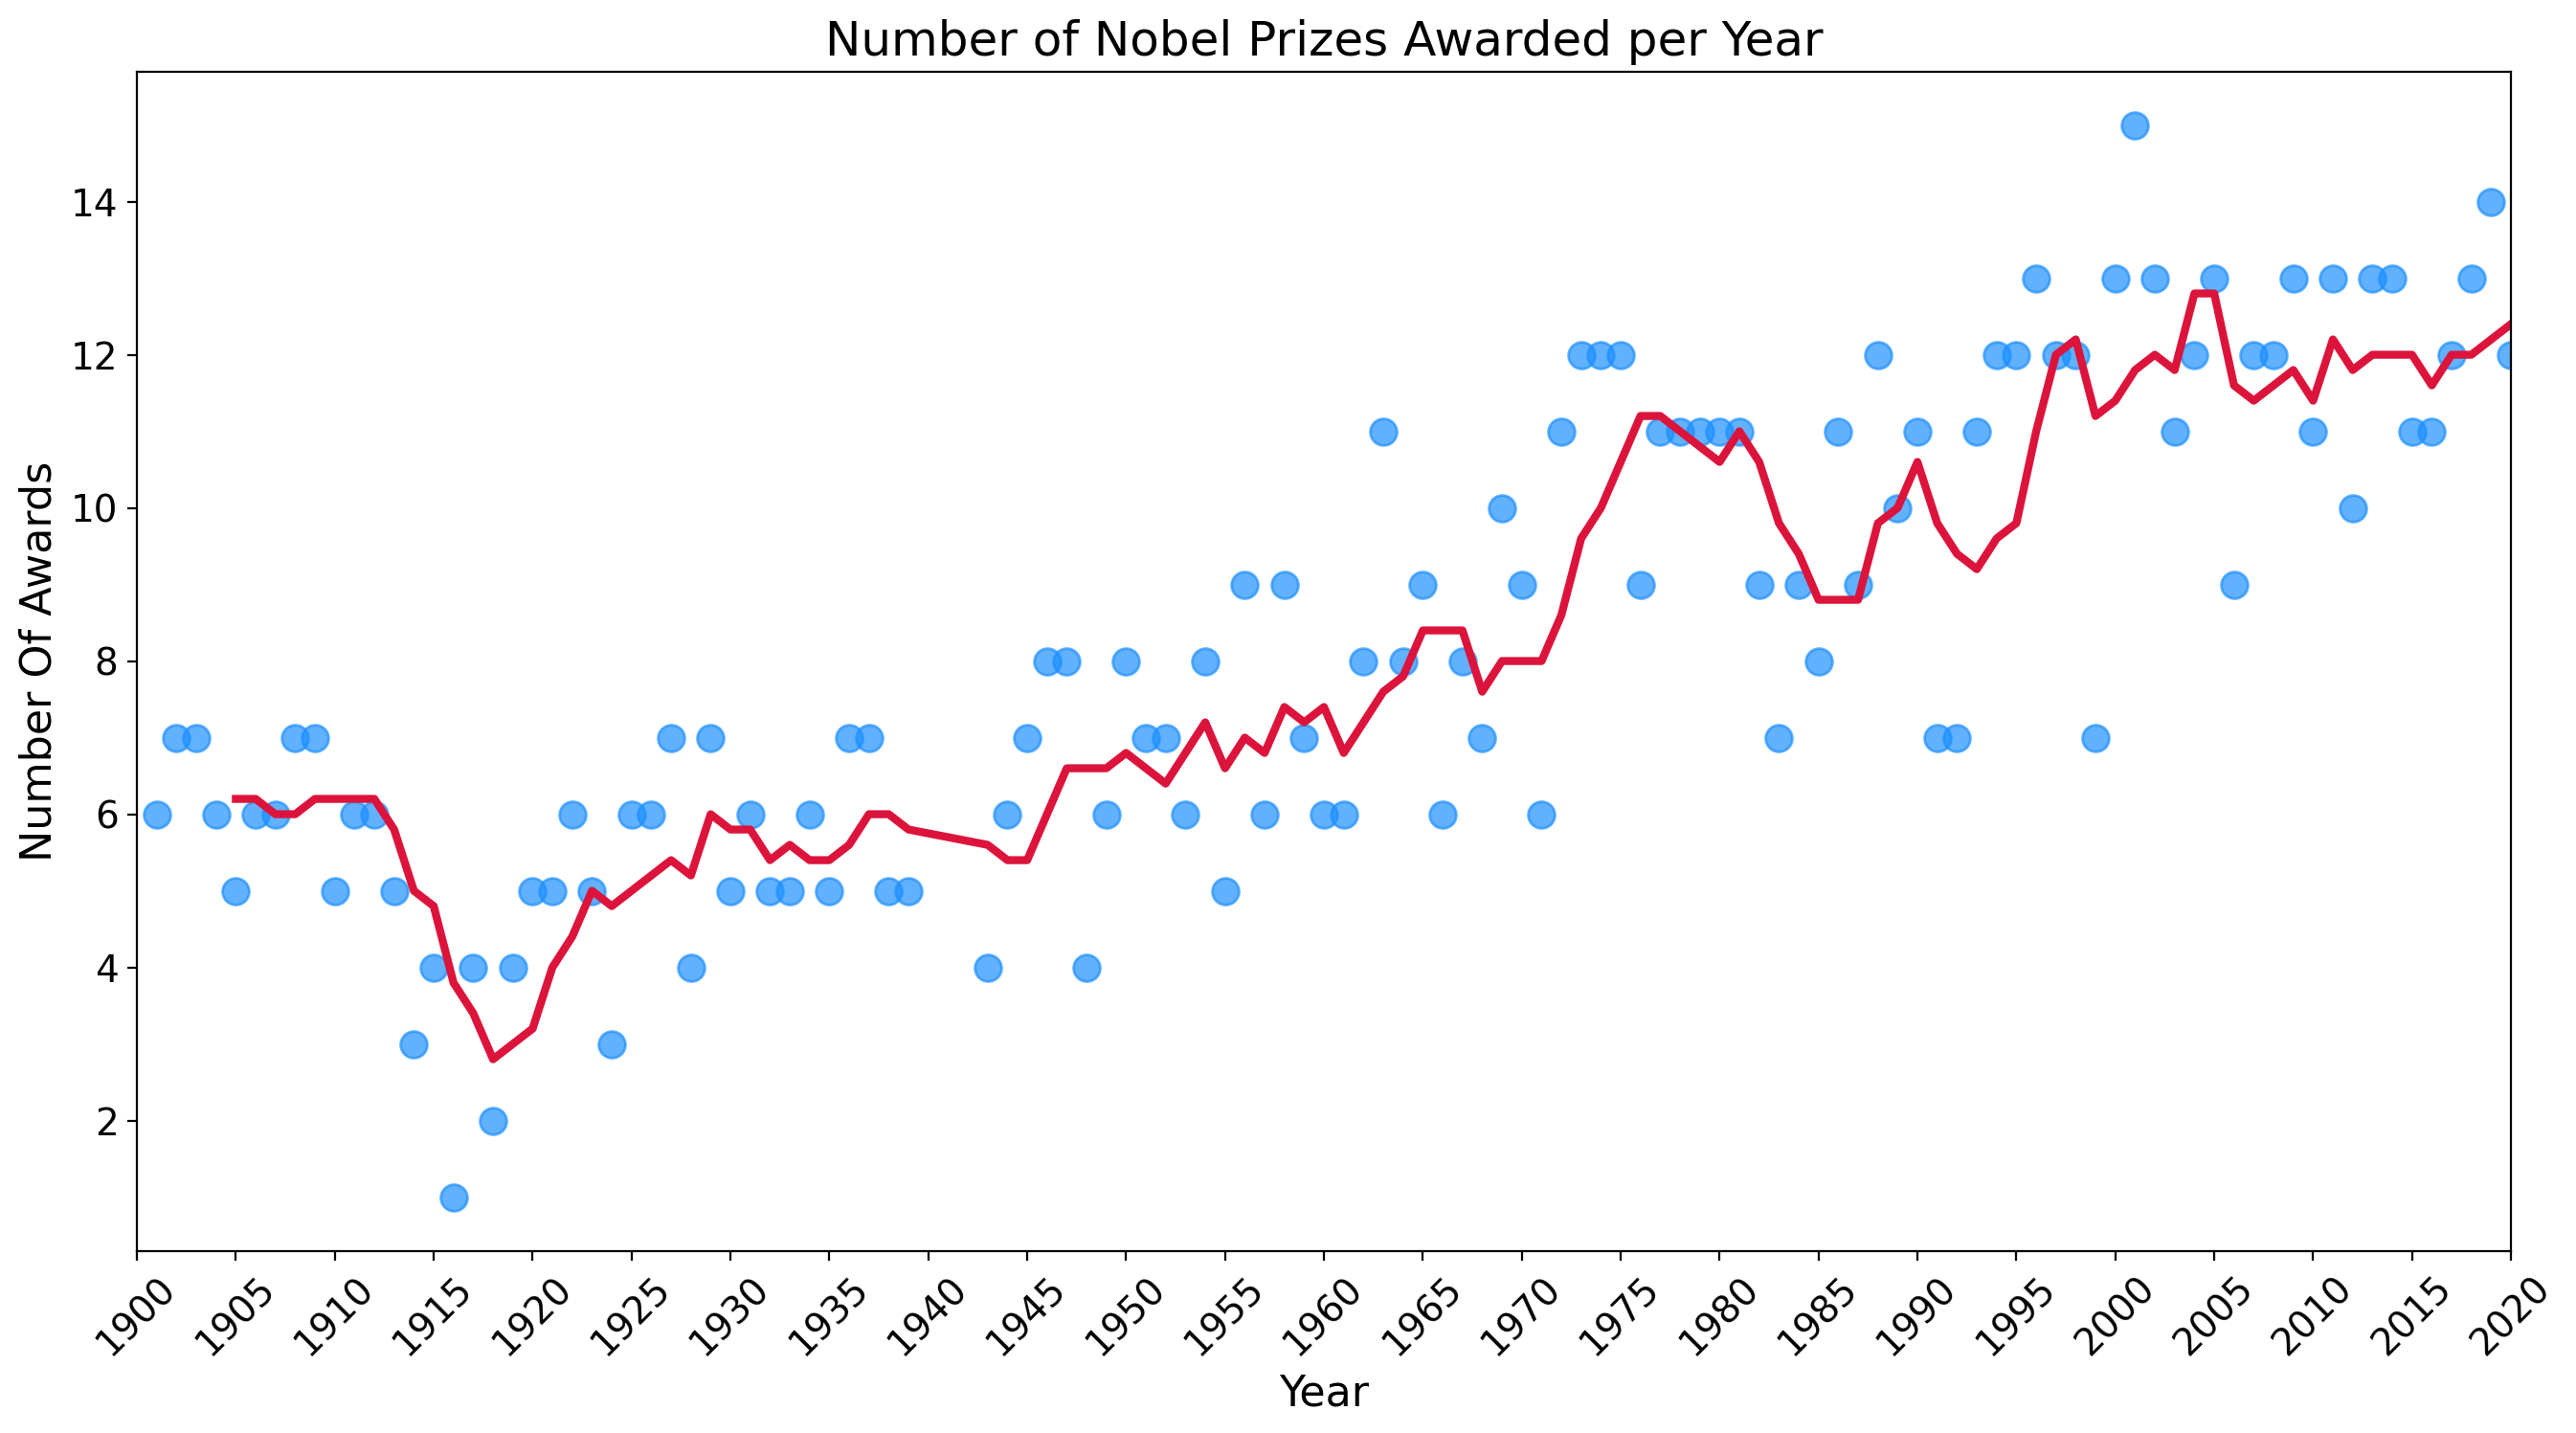

In [36]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
plt.ylabel('Number Of Awards', fontsize=16)
plt.xlabel('Year', fontsize=16)

 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(moving_average.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [37]:
# Calculate the average prize share of the winners on a year by year basis.
yearly_avg_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
sharing_moving_avg = yearly_avg_share.rolling(window=5).mean()

In [38]:
sharing_moving_avg

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

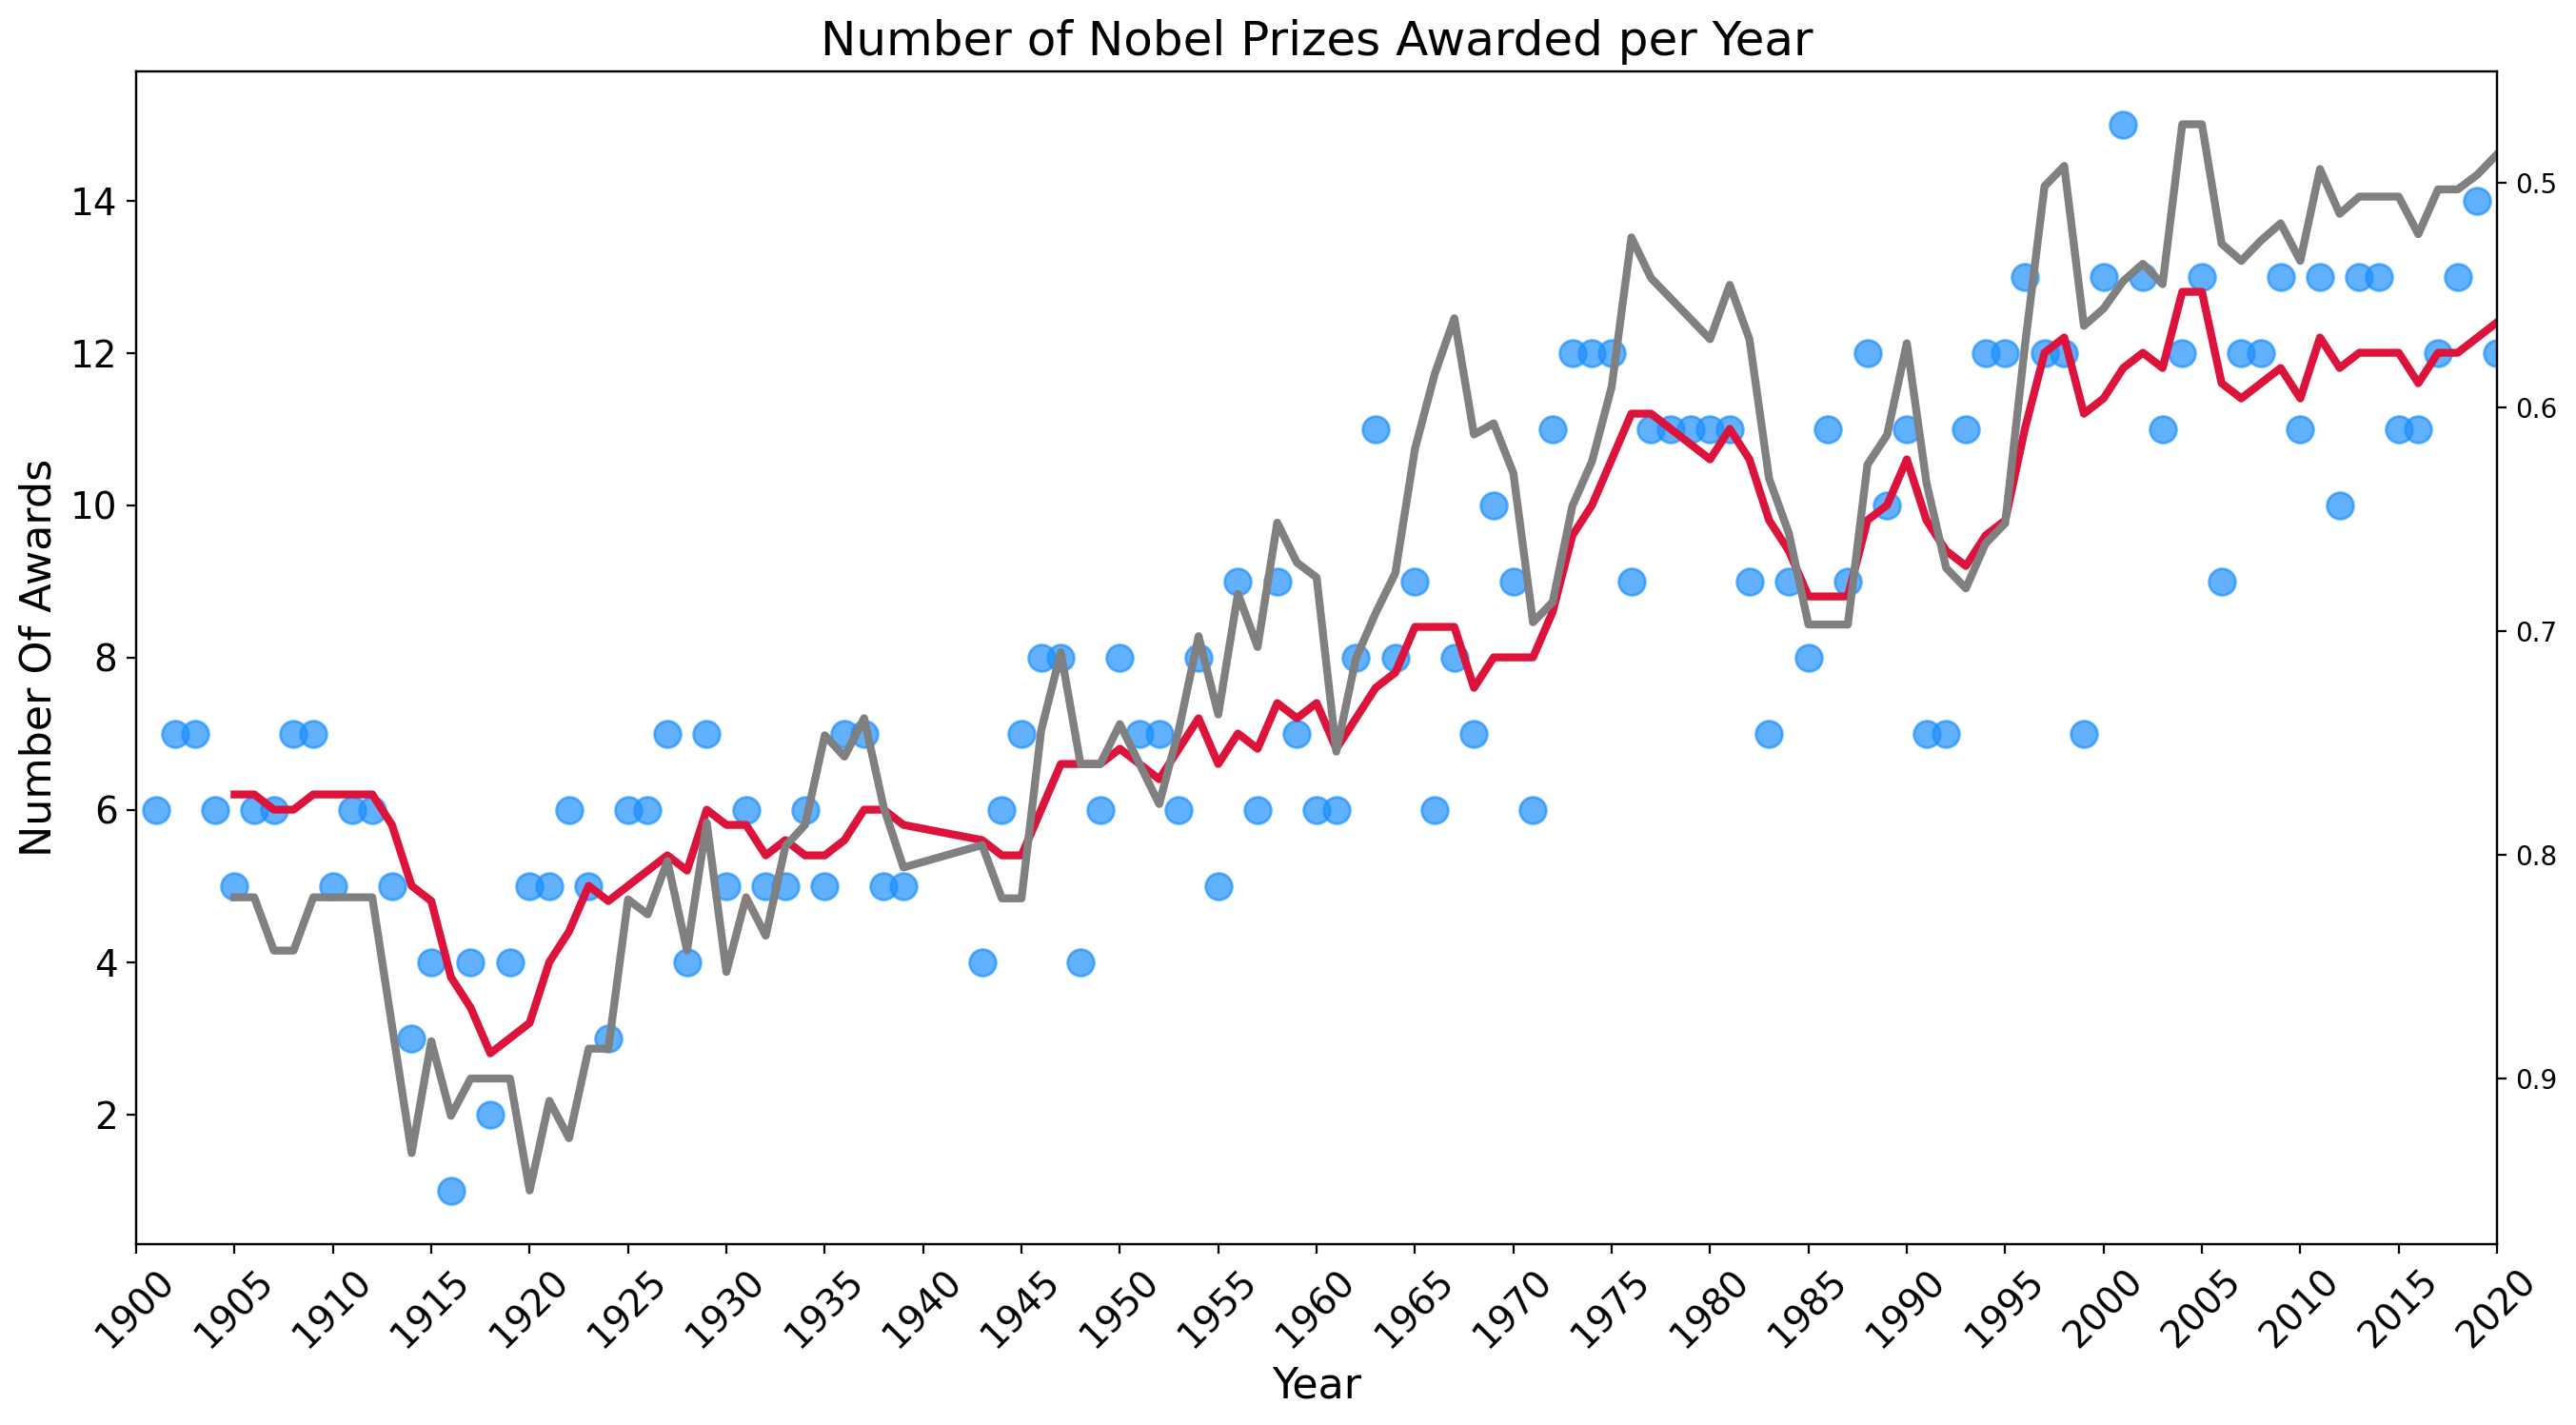

In [39]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
plt.ylabel('Number Of Awards', fontsize=16)
plt.xlabel('Year', fontsize=16)

 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()
ax2.invert_yaxis()

ax1.set_xlim(1900, 2020)
 
ax1.scatter(
    x=prize_per_year.index, 
    y=prize_per_year.values, 
    c='dodgerblue',
    alpha=0.7,
    s=100,
)
 
ax1.plot(
    moving_average.index, 
    moving_average.values, 
    c='crimson', 
    linewidth=3,
)

ax2.plot(
    sharing_moving_avg.index,
    sharing_moving_avg.values,
    c='grey',
    linewidth=3,
)
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [40]:
# Create a Pandas DataFrame called top20_countries that has the two columns. The prize column should contain the total number of prizes won.
df_countries = pd.DataFrame({'birth_country_current': df_data.groupby('birth_country_current').agg({'prize': pd.Series.count}).prize.index,
                               'prize': df_data.groupby('birth_country_current').agg({'prize': pd.Series.count}).prize.values})

In [41]:
top20_countries = df_countries.sort_values(by='prize', ascending=False)[:20]

In [42]:
top20_countries

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
40                     Japan     27
57                    Poland     27
61                    Russia     26
11                    Canada     20
68               Switzerland     19
39                     Italy     19
3                    Austria     18
51               Netherlands     18
20                   Denmark     12
13                     China     12
54                    Norway     12
2                  Australia     10
7                    Belgium      9
33                     India      9
65              South Africa      9

In [43]:
fig = px.bar(
    top20_countries,
    x='prize',
    y='birth_country_current',
    labels={'prize': 'Number of Prizes', 'birth_country_current': 'Birth Country'},
    title='Top 20 Countries By Number Of Prize',
    color='prize',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    coloraxis_showscale=True  # To show the color description if True
#     xaxis_title='Number of Prizes',
#     yaxis_title='Country',
)

fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [44]:
df_num_prize_bycountry = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
df_num_prize_bycountry

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
..                       ...    ...
32                   Iceland      1
47                Madagascar      1
34                 Indonesia      1
36                      Iraq      1
78                  Zimbabwe      1

[79 rows x 2 columns]

In [45]:
# pip install country_converter

In [46]:
import country_converter as coco  # Convert the country name to ISO3 country code

In [47]:
df_num_prize_bycountry.insert(loc=1, column='country_code', value=coco.convert(names=df_num_prize_bycountry.birth_country_current, to='ISO3'))

In [48]:
df_num_prize_bycountry

birth_country_current country_code  prize
74  United States of America          USA    281
73            United Kingdom          GBR    105
26                   Germany          DEU     84
25                    France          FRA     57
67                    Sweden          SWE     29
..                       ...          ...    ...
32                   Iceland          ISL      1
47                Madagascar          MDG      1
34                 Indonesia          IDN      1
36                      Iraq          IRQ      1
78                  Zimbabwe          ZWE      1

[79 rows x 3 columns]

In [49]:
fig = px.choropleth(
    df_num_prize_bycountry,
    locations='country_code',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter
)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [50]:
df_prize_county_bycategeory = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)
df_prize_county_bycategeory

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [51]:
total_prize_bycategory = pd.merge(df_prize_county_bycategeory, df_countries, on='birth_country_current', suffixes=('_cat', '_total'))
total_prize_bycategory

birth_country_current    category  prize_cat  prize_total
0    United States of America    Medicine         78          281
1    United States of America     Physics         70          281
2    United States of America   Chemistry         55          281
3    United States of America   Economics         49          281
4    United States of America       Peace         19          281
..                        ...         ...        ...          ...
206                 Indonesia    Medicine          1            1
207                      Iran  Literature          1            2
208                      Iran       Peace          1            2
209                      Iraq       Peace          1            1
210                  Zimbabwe       Peace          1            1

[211 rows x 4 columns]

In [52]:
fig = px.bar(
    total_prize_bycategory[:50],
    x='prize_cat',
    y='birth_country_current',
    title='Top 20 Countries By Number Of Prize and Category',
    color='category',
    color_continuous_scale='Viridis',
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    coloraxis_showscale=False,  # To show the color description if True
    barmode='stack',
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
)

fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [53]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [54]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [55]:
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [56]:
# Create a plotly line chart where each country is a coloured line.
fig = px.line(
    cumulative_prizes, 
    x='year', y='prize', 
    color='birth_country_current'
)

fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [57]:
top20_org = df_data.organization_name.value_counts().sort_values(ascending=False)[:20]
top20_org

University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Rockefeller University                          13
Max-Planck-Institut                             13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Sorbonne University                              7
University College London                        7
London University                                7
Harvard Medical School         

In [58]:
fig = px.bar(
    x=top20_org.values,
    y=top20_org.index,
    color=top20_org.values,
    color_continuous_scale=px.colors.sequential.haline,
    labels={'y': 'Organization', 'x': 'Number of Prizes'},
    title='Top 20 Organization by Num of Prize',
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    coloraxis_showscale=False
)

fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [59]:
top20_city = df_data.organization_city.value_counts().sort_values(ascending=False)[:20]
top20_city

Cambridge, MA      50
New York, NY       45
Cambridge          31
London             27
Paris              25
Stanford, CA       24
Berkeley, CA       21
Chicago, IL        20
Princeton, NJ      19
Pasadena, CA       17
Oxford             12
Berlin             12
Stockholm          10
Moscow             10
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Los Angeles, CA     8
Ithaca, NY          8
Name: organization_city, dtype: int64

In [60]:
fig = px.bar(
    y=top20_city.index,
    x=top20_city.values,
    color=top20_city.values,
    orientation='h',
    labels={'y': 'City', 'x': 'Number of Prizes'},
    title='Cities with most Research'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    coloraxis_showscale=False
)

fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [61]:
df_data[:1]

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  share_pct  \
0  "in recognition of the extraordinary services ...         1/1       1.00   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [62]:
top20_birthcity = df_data.birth_city.value_counts().sort_values(ascending=False)[:20]
top20_birthcity

New York, NY             53
Paris                    26
London                   19
Vienna                   14
Chicago, IL              12
Berlin                   11
Washington, DC            8
Brooklyn, NY              8
Budapest                  8
Boston, MA                8
Munich                    7
Moscow                    7
Stockholm                 6
Hamburg                   6
Frankfurt-on-the-Main     5
Prague                    5
Pittsburgh, PA            4
Montreal                  4
Cairo                     4
Dublin                    3
Name: birth_city, dtype: int64

In [63]:
fig = px.bar(
    x=top20_birthcity.values,
    y=top20_birthcity.index,
    color=top20_birthcity.values,
    color_continuous_scale='Plasma',
    labels={'y': 'Birth City', 'x': 'Number of Prizes'},
    title='Top 20 Birth City by Number of Prizes',
)

fig.update_layout(
    yaxis = {'categoryorder': 'total ascending'},
    coloraxis_showscale = False
)

fig.show()

In [64]:
asd = df_data.birth_city.value_counts()
asd[asd.index=='New York, NY'].values[0] / asd.sum() * 100

5.692803437164339

In [65]:
df_data.birth_city.value_counts()[:10].sum()

167

In [66]:
df_data.birth_city.value_counts()[:10]

New York, NY      53
Paris             26
London            19
Vienna            14
Chicago, IL       12
Berlin            11
Washington, DC     8
Brooklyn, NY       8
Boston, MA         8
Budapest           8
Name: birth_city, dtype: int64

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [67]:
# Create a DataFrame that groups the number of prizes by organisation.

df_num_prize_byorganization = df_data.groupby(['organization_country', 'organization_city','organization_name'], as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)[:50]
df_num_prize_byorganization

organization_country  organization_city  \
205  United States of America      Cambridge, MA   
280  United States of America       Stanford, CA   
206  United States of America      Cambridge, MA   
209  United States of America        Chicago, IL   
195  United States of America       Berkeley, CA   
163            United Kingdom          Cambridge   
248  United States of America       New York, NY   
255  United States of America       Pasadena, CA   
260  United States of America      Princeton, NJ   
252  United States of America       New York, NY   
185            United Kingdom             Oxford   
161            United Kingdom          Cambridge   
242  United States of America      New Haven, CT   
227  United States of America         Ithaca, NY   
37                     France              Paris   
177            United Kingdom             London   
201  United States of America         Boston, MA   
190  United States of America      Baltimore, MD   
53                    Germany             Berlin   
181            United Kingdom             London   
229  United States of America    Los Angeles, CA   
35                     France              Paris   
75                    Germany         Heidelberg   
140                    Sweden            Uppsala   
69                    Germany          Göttingen   
136                    Sweden          Stockholm   
215  United States of America         Dallas, TX   
84                    Germany             Munich   
273  United States of America  Santa Barbara, CA   
196  United States of America       Bethesda, MD   
150               Switzerland             Zurich   
257  United States of America   Philadelphia, PA   
149               Switzerland         Rüschlikon   
278  United States of America      St. Louis, MO   
129                    Russia             Moscow   
272  United States of America  San Francisco, CA   
282  United States of America         Urbana, IL   
106                     Japan              Kyoto   
239  United States of America    Murray Hill, NJ   
203  United States of America        Boulder, CO   
276  United States of America        Seattle, WA   
251  United States of America       New York, NY   
250  United States of America       New York, NY   
151               Switzerland             Zurich   
146               Switzerland             Geneva   
270  United States of America      San Diego, CA   
183            United Kingdom         Manchester   
60                    Germany      Berlin-Dahlem   
174            United Kingdom             London   
70                    Germany          Göttingen   

                                     organization_name  prize  
205                                 Harvard University     29  
280                                Stanford University     23  
206        Massachusetts Institute of Technology (MIT)     21  
209                              University of Chicago     20  
195                           University of California     19  
163                            University of Cambridge     18  
248                                Columbia University     17  
255       California Institute of Technology (Caltech)     17  
260                               Princeton University     15  
252                             Rockefeller University     13  
185                               University of Oxford     12  
161                MRC Laboratory of Molecular Biology     10  
242                                    Yale University      9  
227                                 Cornell University      8  
37                                 Sorbonne University      7  
177                                  London University      7  
201                             Harvard Medical School      7  
190                           Johns Hopkins University      6  
53                                   Berlin University      6  
181                          University College London      6  
229         

In [68]:
fig = px.sunburst(
    df_num_prize_byorganization,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize'
)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 


In [69]:
df_data.year - df_data.birth_date.dt.year

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Length: 962, dtype: float64

In [74]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year

In [75]:
df_data.winning_age.fillna(0)

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958    0.00
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

In [76]:
# df_data['winning_age'] = df_data['winning_age'].astype('int')

In [77]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  share_pct  \
0  "in recognition of the extraordinary services ...         1/1       1.00   
1  "in special recognition of his poetic composit...         1/1       1.00   
2  "for his work on serum therapy, especially its...         1/1       1.00   
3                                                NaN         1/2       0.50   
4                                                NaN         1/2       0.50   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  winning_age  
0            Berlin              Germany  NLD        49.00  
1               NaN                  NaN  FRA        62.00  
2           Marburg              Germany  POL        47.00  
3               NaN                  NaN  FRA        79.00  
4               NaN                  NaN  CHE        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [78]:
df_data_clean = df_data[df_data.winning_age.isnull() == False]

In [79]:
# What are the names of the youngest Nobel laureate?
# What did they win the prize for?

df_data_clean.sort_values(by='winning_age', ascending=False)[-1:][['full_name', 'prize', 'motivation']]

full_name                       prize  \
885  Malala Yousafzai  The Nobel Peace Prize 2014   

                                            motivation  
885  "for their struggle against the suppression of...

In [80]:
# What are the names of the oldest Nobel laureate?
# What did they win the prize for?

df_data_clean.sort_values(by='winning_age', ascending=False)[:1][['full_name', 'prize', 'motivation']]

full_name                              prize  \
937  John Goodenough  The Nobel Prize in Chemistry 2019   

                                         motivation  
937  “for the development of lithium-ion batteries”

In [81]:
# What are the names of the oldest Nobel laureate?
# What did they win the prize for?

df_data_clean.nlargest(n=1, columns='winning_age')[['full_name', 'prize', 'motivation', 'winning_age']]

full_name                              prize  \
937  John Goodenough  The Nobel Prize in Chemistry 2019   

                                         motivation  winning_age  
937  “for the development of lithium-ion batteries”        97.00

In [82]:
# What are the names of the youngest Nobel laureate?
# What did they win the prize for?

df_data_clean.nsmallest(n=1, columns='winning_age')[['full_name', 'prize', 'motivation','winning_age']]

full_name                       prize  \
885  Malala Yousafzai  The Nobel Peace Prize 2014   

                                            motivation  winning_age  
885  "for their struggle against the suppression of...        17.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [83]:
# What is the average age of a winner?
df_data_clean.describe()

year  share_pct  winning_age
count   934.00     934.00       934.00
mean  1,971.68       0.62        59.95
std      33.82       0.29        12.62
min   1,901.00       0.25        17.00
25%   1,948.00       0.33        51.00
50%   1,977.00       0.50        60.00
75%   2,000.75       1.00        69.00
max   2,020.00       1.00        97.00

[Text(0.5, 0, 'Age')]

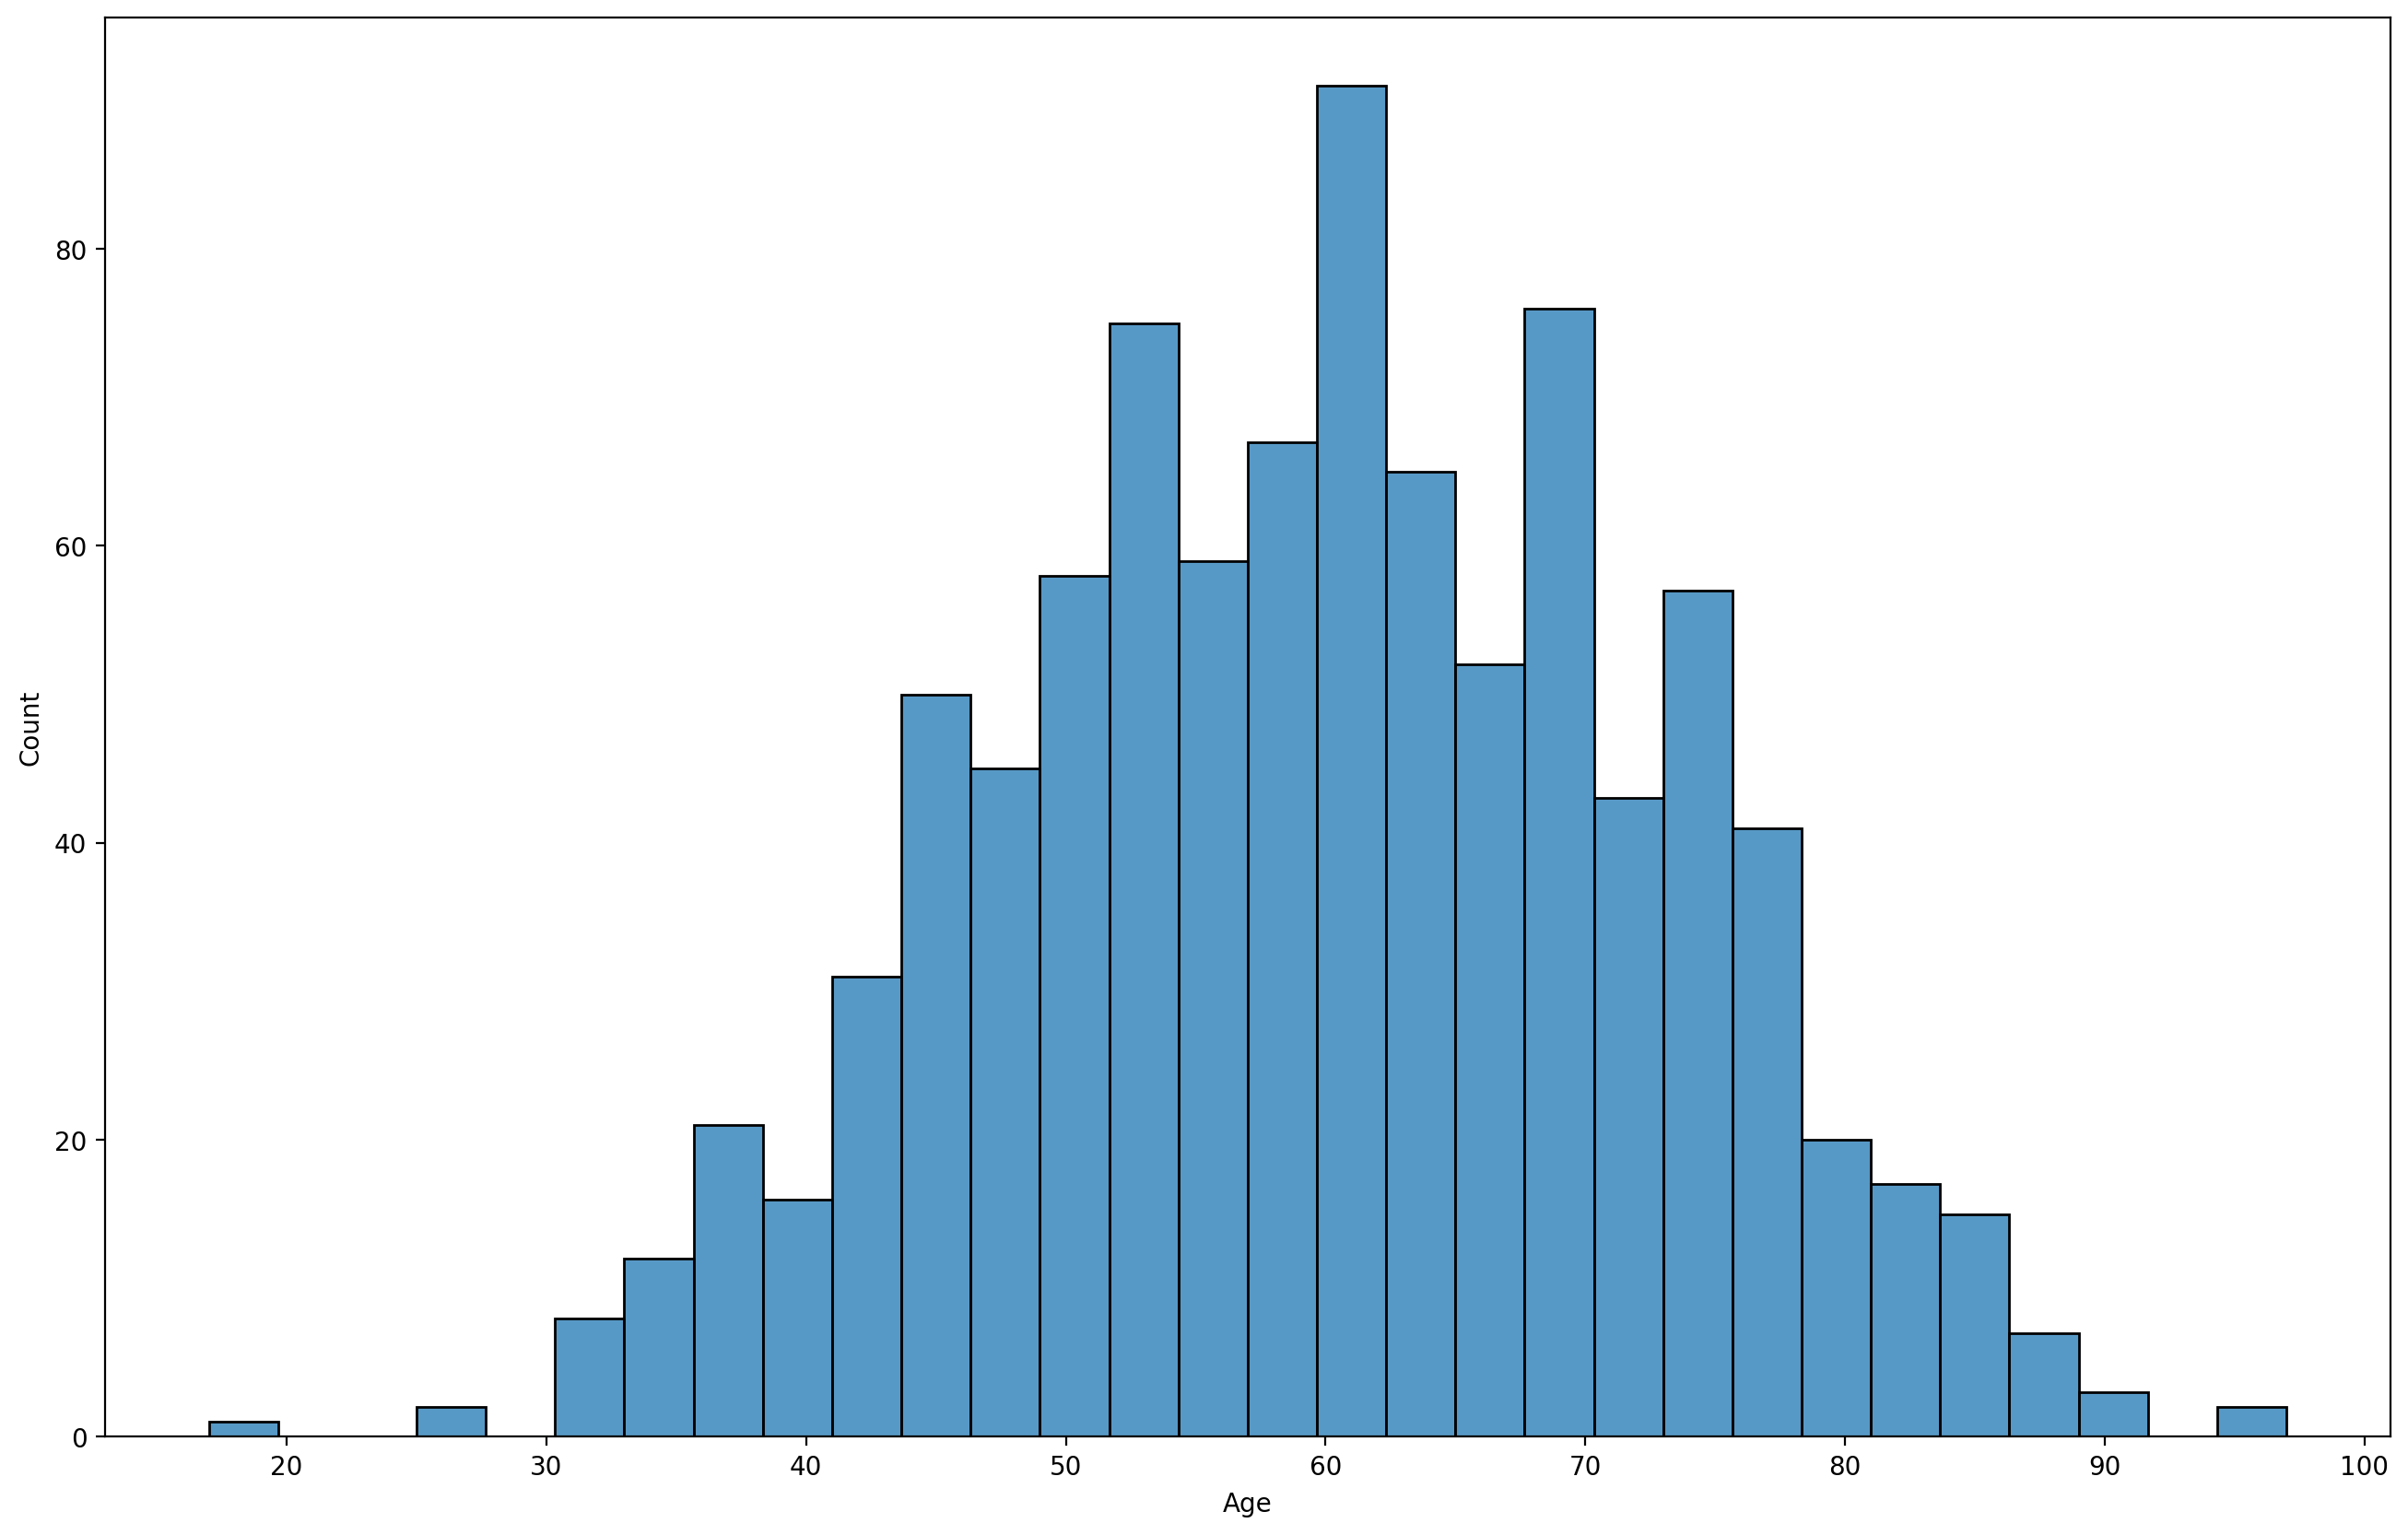

In [84]:
plt.figure(figsize=(16,10), dpi=200)

fig = sns.histplot(
    data=df_data_clean,
    x='winning_age',
    bins=30,
)

fig.set(
    xlabel='Age',
)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


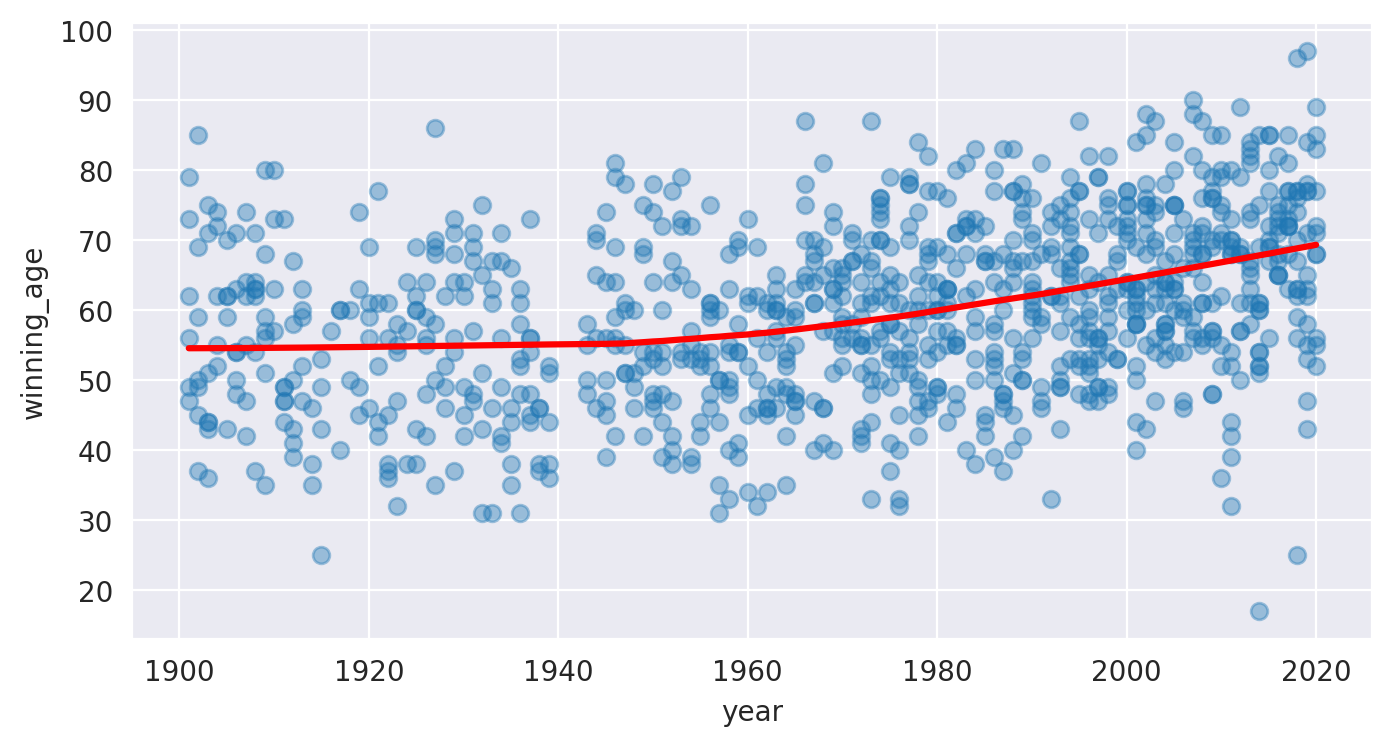

In [133]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.regplot(
        data=df_data,
        x='year',
        y='winning_age',
        scatter_kws = {'alpha': 0.4},
        line_kws={'color': 'red'},
        lowess=True
    )
    
plt.show()


In [ ]:
# We can conclude from the trendchart above that Lauren's age is increasing over time. 

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

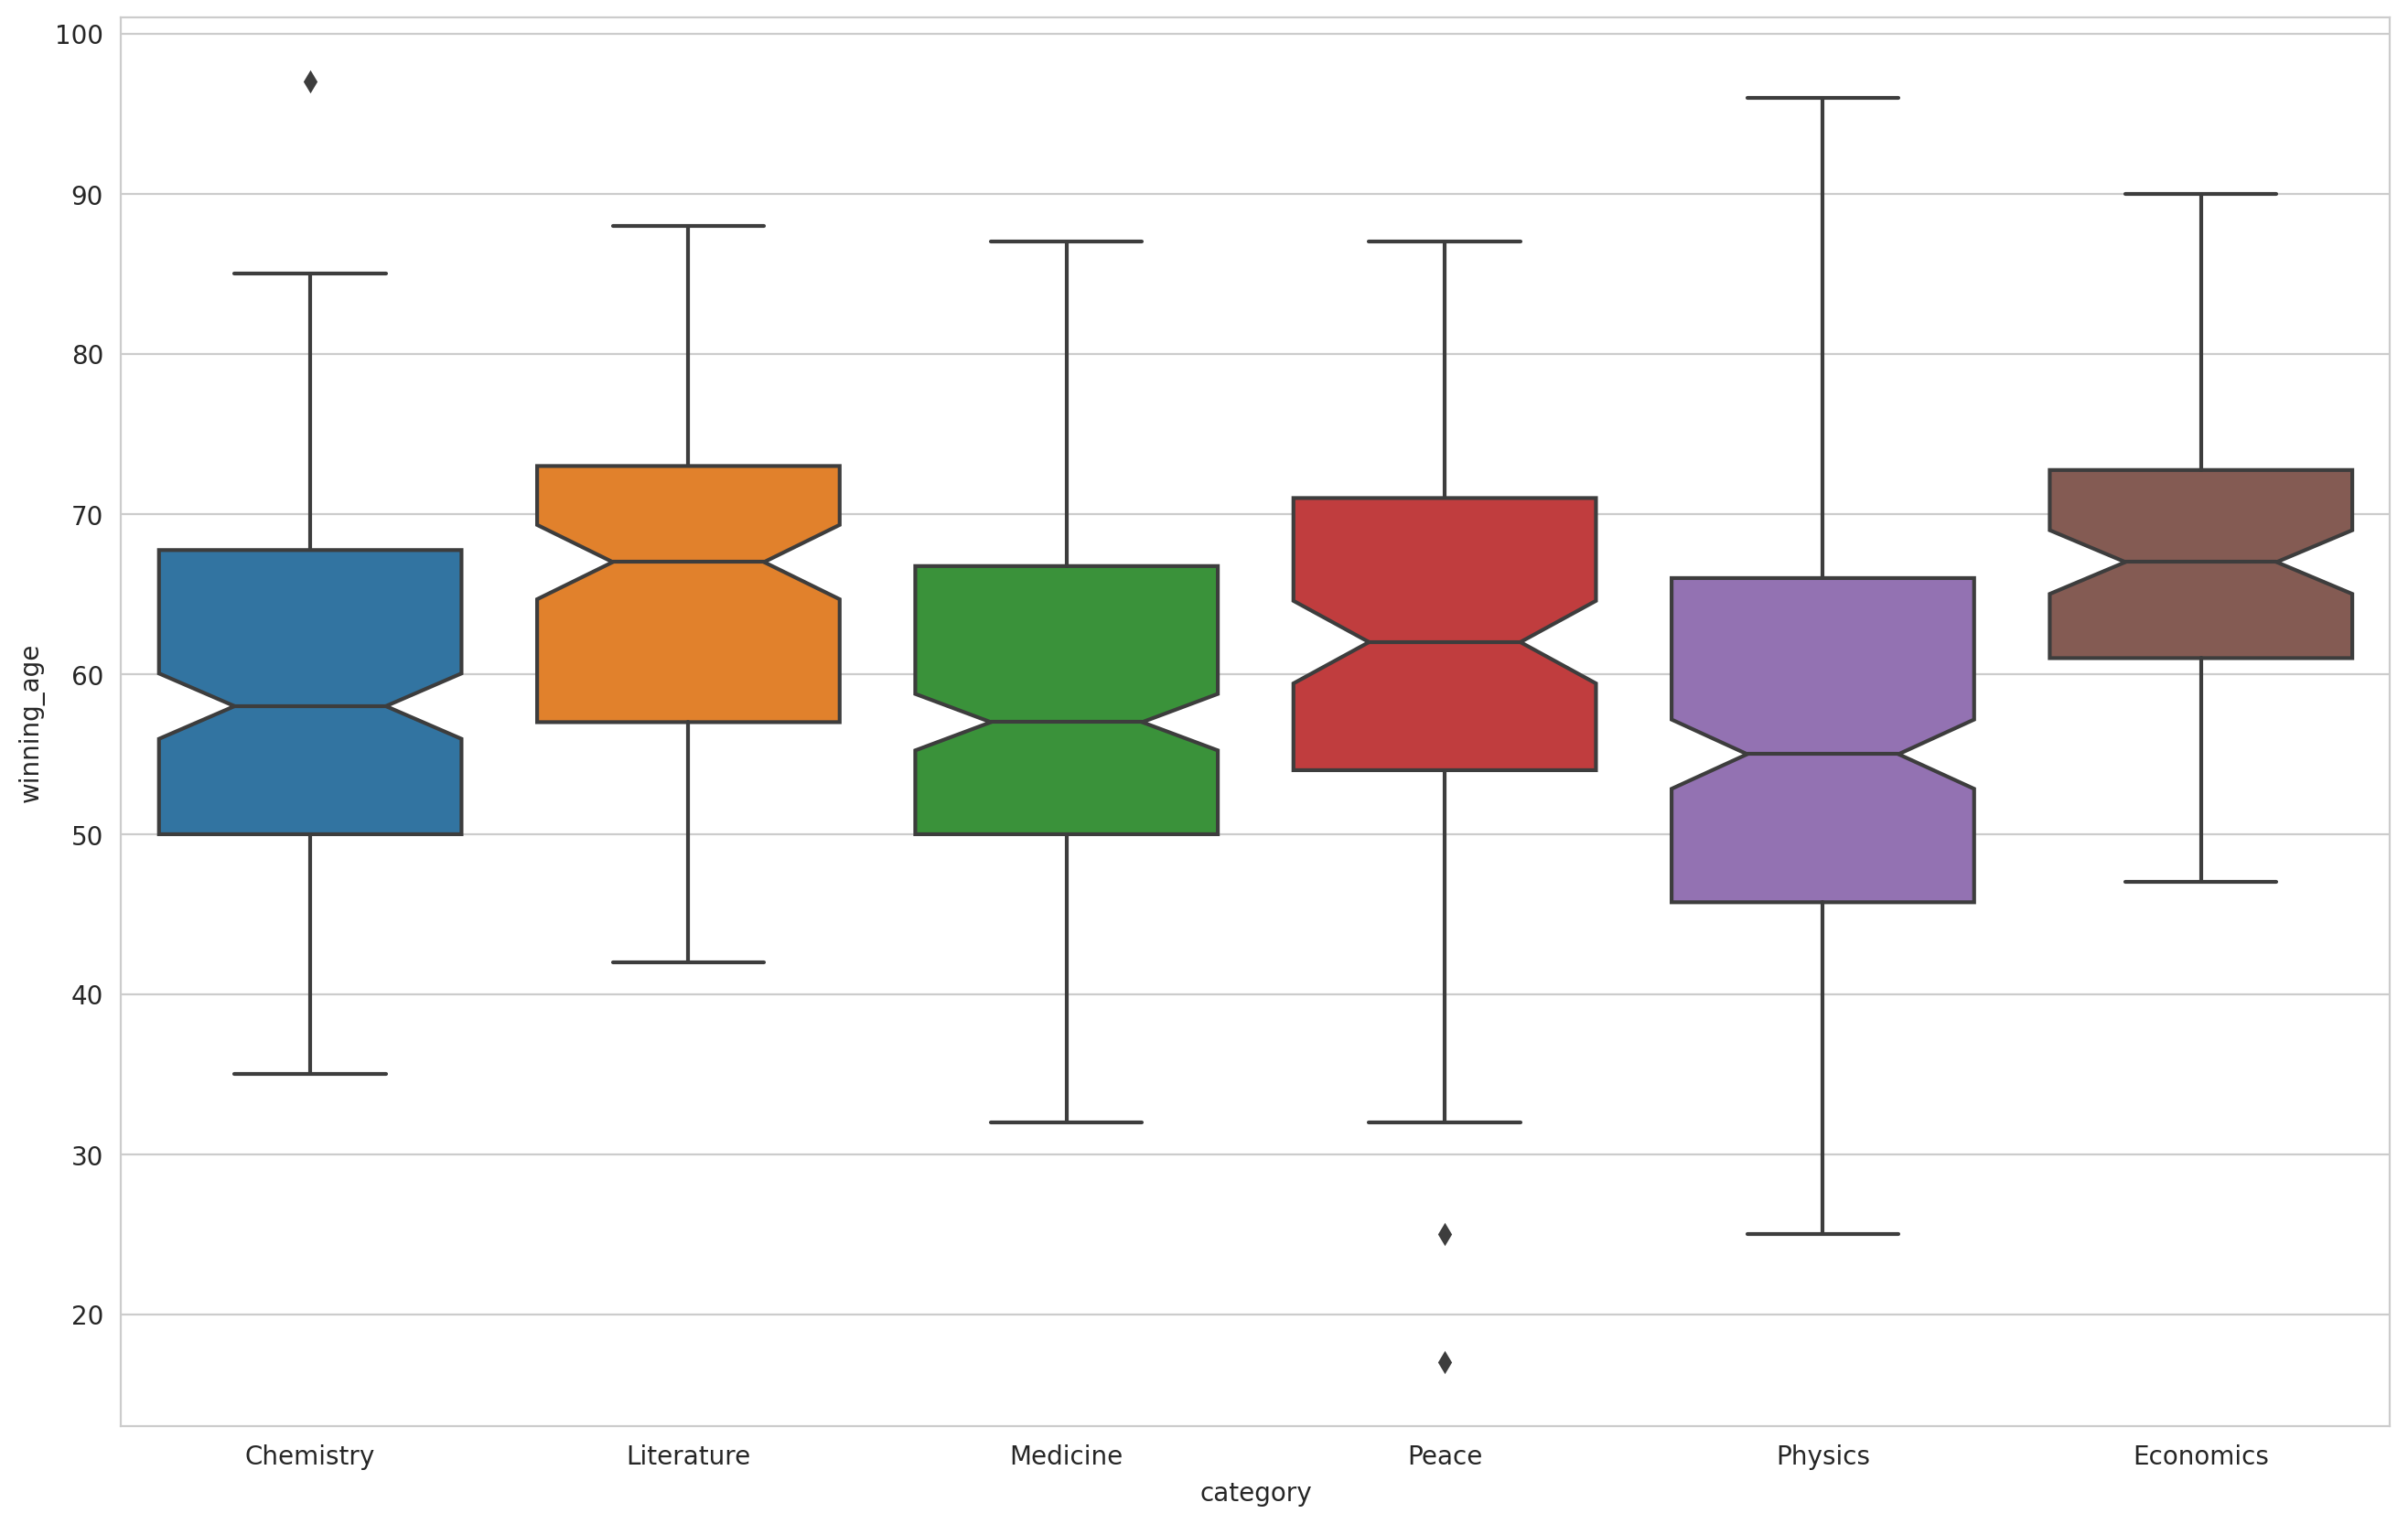

In [146]:
plt.figure(figsize=(16,10), dpi=200)

with sns.axes_style('whitegrid'):
    sns.boxplot(
        data=df_data,
        x='category',
        y='winning_age',
        notch=True,
    #     linewidth=1
    )
    
plt.show()

In [121]:
# In which prize category are the average winners the oldest?
print('The oldest average winner is in category economics.')

The oldest average winner is in category economics.


In [122]:
# In which prize category are the average winners the youngest?
print('The youngest average winner is in category Physics')

The youngest average winner is in category Physics


**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


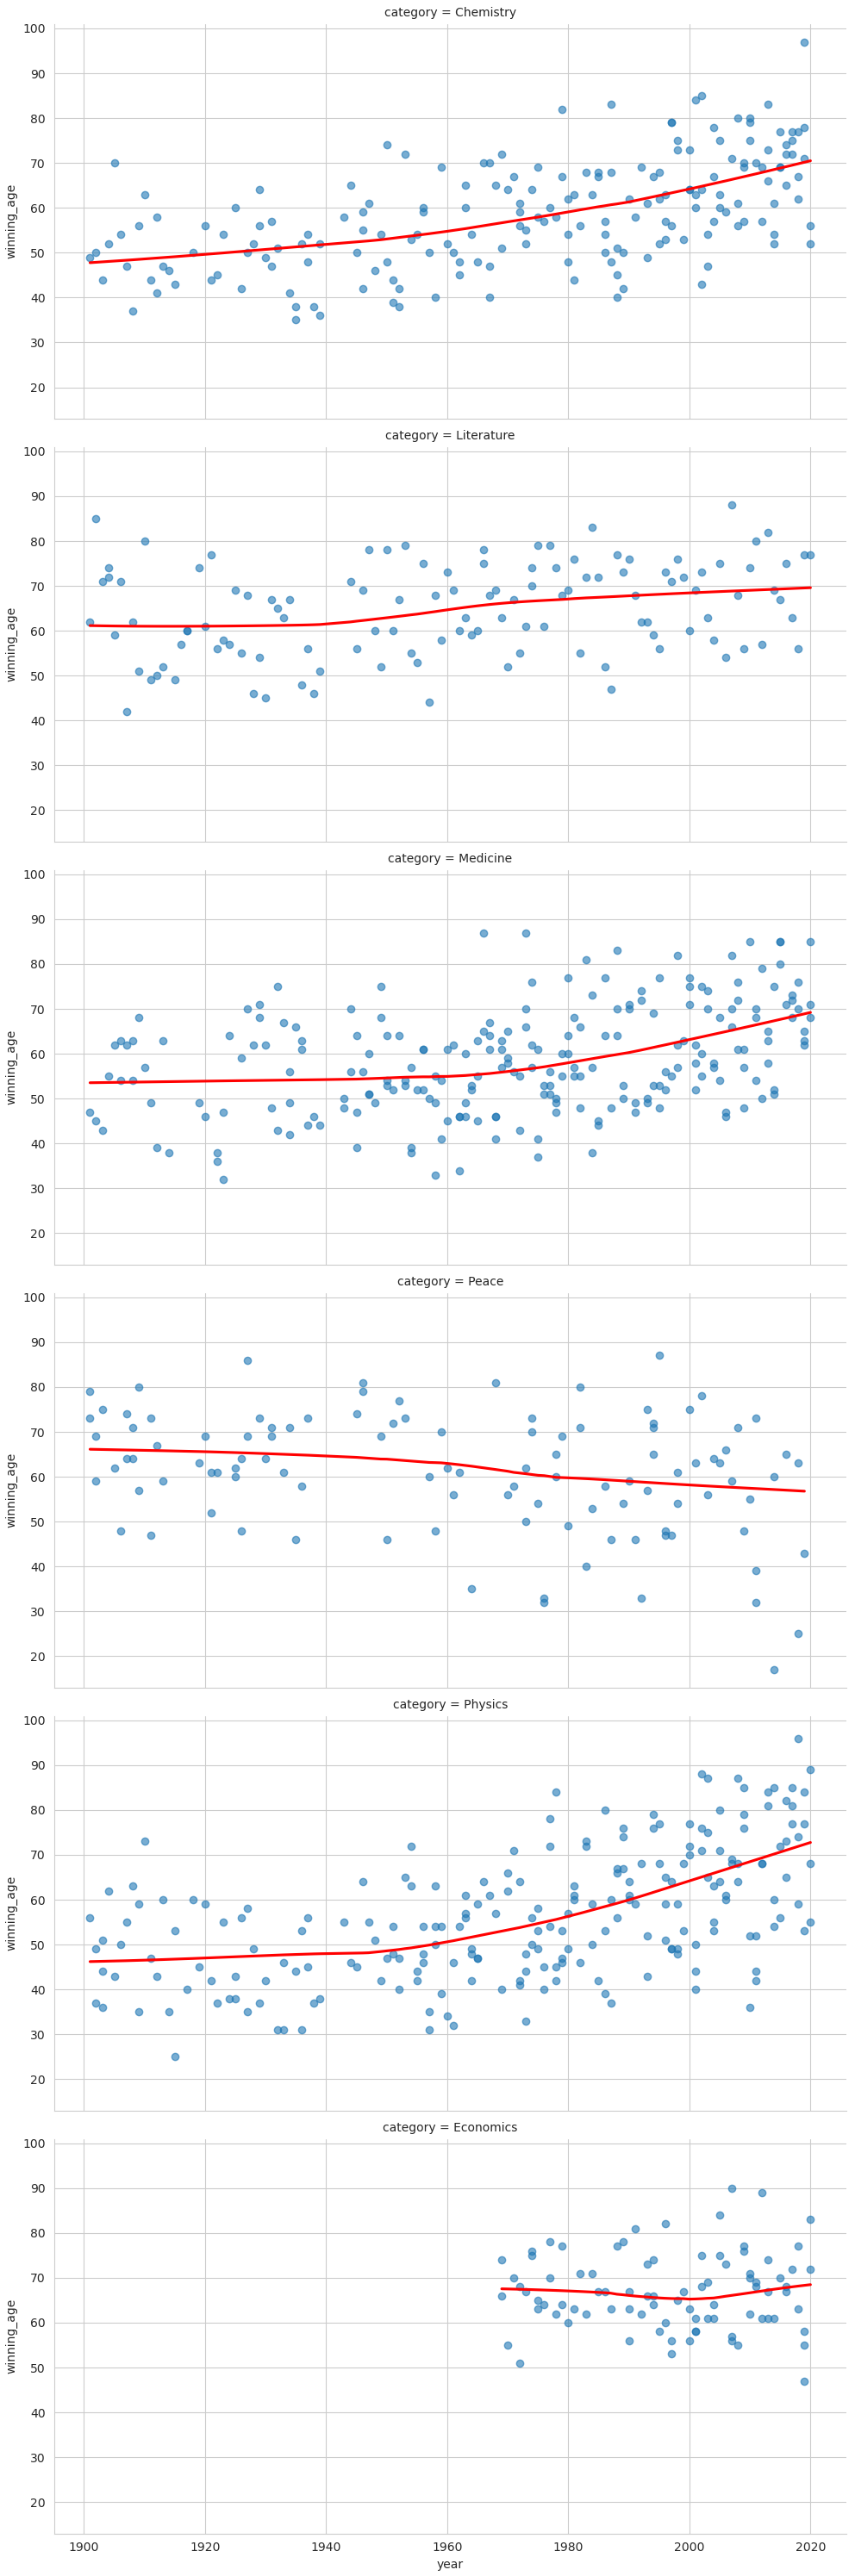

In [144]:
with sns.axes_style('whitegrid'):
    sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        row='category',
        lowess=True,
        aspect=2,
        scatter_kws = {'alpha': 0.6},
        line_kws={'color': 'red'},
    )
    
plt.show()

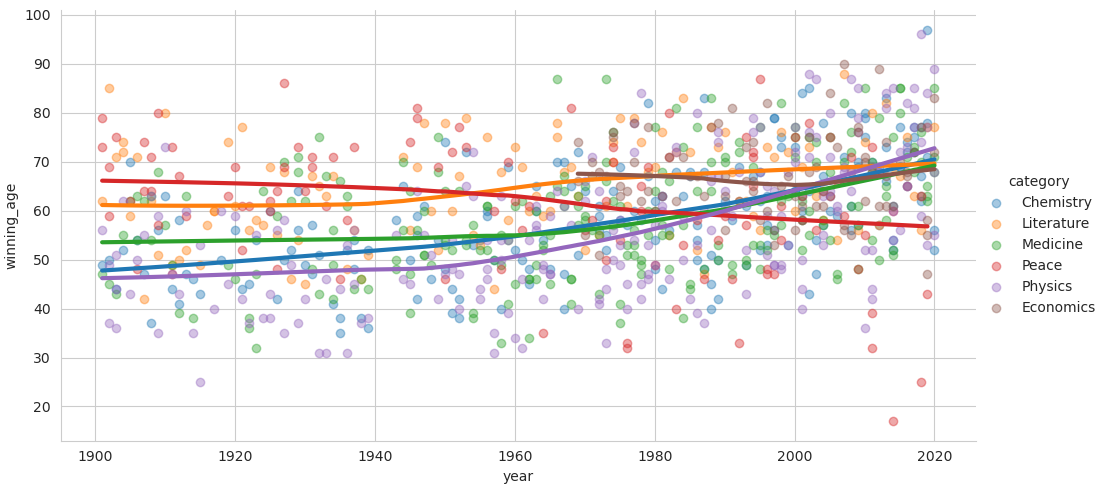

In [141]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        lowess=True,
        aspect=2,
        scatter_kws = {'alpha': 0.4},
        line_kws={'linewidth': '3'},
        hue='category'
    )

plt.show()